In [1]:
import pandas as pd
# Load data from the Excel sheet
file_path = "/Users/elchulito/Library/CloudStorage/OneDrive-polymtlus/0 - A_Database and methodology_PhD/PlasticFADE.xlsx"
sheet_name = "RC+CI"

# Read and display the data
data_F = pd.read_excel(file_path, sheet_name=sheet_name, usecols='A:E', skiprows=2)
pd.set_option('display.float_format', '{:.2e}'.format)
data_F = data_F.dropna(how='all')  # Drop rows where all columns are NaN

'''
# Filter to keep only rows with non-zero values in all three columns
rate_cols = ['kfrag [d-1]', 'kfrag_LL [d-1]', 'kfrag_UL [d-1]']
data_F = data_F[(data_F[rate_cols] != 0).all(axis=1)]
'''

print(data_F)

   Polymer Compartment  kfrag [d-1]  kfrag_LL [d-1]  kfrag_UL [d-1]
0       PP         Air     1.54e-05        9.84e-09        2.18e+00
1       PP        TopS     3.71e-06        5.67e-09        1.61e-01
2       PP        SubS     0.00e+00        0.00e+00        0.00e+00
3       PP       Beach     1.17e-03        3.26e-07        3.49e+01
4       PP        WSur     1.79e-04        3.30e-08        1.14e+01
5       PP        WCol     4.23e-13        2.02e-25        6.81e-05
6       PP        Sedm     0.00e+00        0.00e+00        0.00e+00
7       PS         Air     2.42e-06        2.36e-06        2.49e-06
8       PS        TopS     1.91e-07        1.86e-07        1.96e-07
9       PS        SubS     0.00e+00        0.00e+00        0.00e+00
10      PS       Beach     1.66e-01        1.61e-01        1.71e-01
11      PS        WSur     2.44e-04        2.36e-04        2.52e-04
12      PS        WCol     5.04e-34        4.62e-34        5.48e-34
13      PS        Sedm     0.00e+00        0.00e

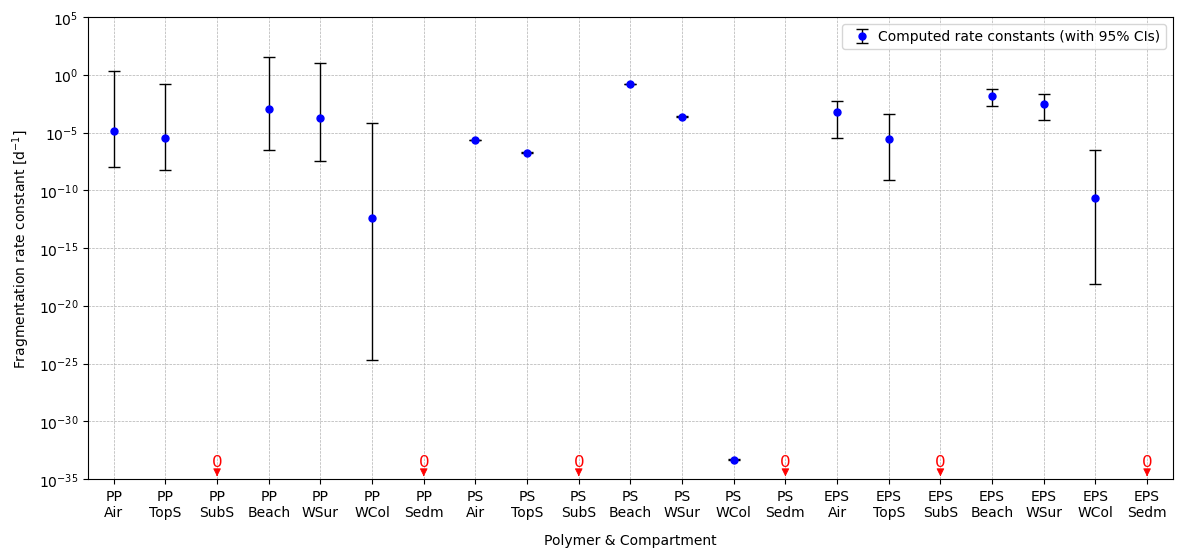

In [7]:
# Original plotting procedure for FRAG rate constants
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(14, 6))

x = range(len(data_F))
data_F['x_labels'] = data_F['Polymer'] + '\n' + data_F['Compartment']

y = data_F['kfrag [d-1]']
yerr_lower = y - data_F['kfrag_LL [d-1]']
yerr_upper = data_F['kfrag_UL [d-1]'] - y
yerr = [yerr_lower, yerr_upper]  # Asymmetric error bars

# Plot main results with asymmetric error bars
plt.errorbar(x, y, yerr=yerr, fmt='o', color='blue', ecolor='black', markersize=5,
             elinewidth=1, capsize=4, label='Computed rate constants (with 95% CIs)')

# Show the outliers (outside the plot boundary)
y_max = 1e+5
label_y = y_max * 10**1.0  # X% above the plot top
min_display_y = 1e-35

for i in range(len(data_F)):
    upper = data_F['kfrag_UL [d-1]'].iloc[i]
    y_val = y.iloc[i]
    if upper > y_max:
        label = f"{upper:.1e}"

        plt.plot(
            [i, i],              # x-coordinates
            [y_max, label_y],    # from plot top to label
            color='grey',
            linewidth=1,
            linestyle=':',
            clip_on=False  
        )       

    # Draw text label
        plt.text(
            i, label_y,
            label,
            ha='center',
            va='bottom',
            # fontsize=9,
            color='grey'
        )

    # Zero value: mark below x axis
    if y_val < min_display_y:
        y_zero_marker = min_display_y * 1  # Position arrow slightly above the bottom limit
        y_zero_label = y_zero_marker * 7
        plt.annotate(
            '0', 
            xy=(i, y_zero_marker),       # Position the arrow tip
            xytext=(i, y_zero_label),  # Position the text above the arrow
            textcoords='data',
            ha='center',
            va='bottom',
            fontsize=12,
            color='red',
            arrowprops=dict(arrowstyle='-|>', color='red', lw=0.6),
            clip_on=False
        )

# Configure x-axis
plt.xticks(x, data_F['x_labels'])
plt.yscale('log')
plt.xlabel('Polymer & Compartment', labelpad=10)
plt.ylabel('Fragmentation rate constant [d$^{-1}$]', labelpad=5)
plt.legend(loc='upper right', handletextpad=0.2)
plt.xlim(-0.5, len(data_F) - 0.5)  # Pull the first and last data points closer to the edge of the plot
plt.ylim(1e-35, 1e+5)  # Set the y-axis range (change manually)
plt.gca().yaxis.set_major_locator(FixedLocator([10**exp for exp in range(-35, 6, 5)]))  # Manually set the tick positions at every 1e5
plt.grid(True, which="major", ls="--", lw=0.5)

plt.savefig("/Users/elchulito/FRAG.png", dpi=600, bbox_inches='tight')
plt.show()